In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import glob
import os

from neuroformer.visualize import set_research_params

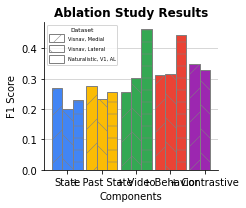

In [2]:
import matplotlib.lines as mlines

exp_pth_lat = "./models/tensorboard/visnav_lateral/behavior_pred_exp/classification/ablations_1"
exp_path_med = "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/1"
exp_path_v1al = "./models/tensorboard/Combo3_V1AL/interval_correction/downstream_exp/ablations_2"

# Load your datasets
df1 = pd.read_csv(os.path.join(exp_pth_lat, 'f1_results.csv'))
df2 = pd.read_csv(os.path.join(exp_path_med, 'f1_results.csv'))
df3 = pd.read_csv(os.path.join(exp_path_v1al, 'f1_results.csv'))

# set colors
model_colors = ["#4285F4", "#FBBC05", "#34A853", "#EA4335", "#9C27B0"]

# # Make sure your dataframes are sorted by model_name to align bars correctly
# df1 = df1.sort_values('model', ascending=False)
# df2 = df2.sort_values('model', ascending=False)
# df3 = df3.sort_values('model', ascending=False)

# Define the bar width
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = np.arange(len(df1))
r2 = np.arange(len(df2)) + bar_width
r3 = np.arange(len(df3)) + (2 * bar_width)

# Create the bar chart
plt.figure(figsize=(3.5, 3))
bars = plt.bar(r1, df1['f1'], color=model_colors, width=bar_width, edgecolor='grey', label='Dataset1', hatch='/')
plt.bar(r2, df2['f1'], color=model_colors, width=bar_width, edgecolor='grey', label='Dataset2', hatch='\\')
plt.bar(r3, df3['f1'], color=model_colors, width=bar_width, edgecolor='grey', label='Dataset3', hatch='-')

# Add xticks on the middle of the grouped bars
plt.xlabel('Components')
plt.xticks([r + bar_width for r in range(len(df1))], df1['model']) # rotation=45)

# Add xticks on the middle of the grouped bars
plt.xlabel('Components')
plt.xticks([r + bar_width for r in range(len(df1))], df1['model'])#  rotation=45)
# add Yticks
plt.ylabel('F1 Score')
plt.title('Ablation Study Results', fontweight='bold')

# add grid and send back
plt.grid(axis='y', linewidth=0.5)
plt.gca().set_axisbelow(True)


# Create a legend and show the plot
# hatch_handles = [plt.Rectangle((2,2),2,2, fill=False, edgecolor='grey', hatch=pattern, linewidth=0.5) for pattern in ['/', '\\', '-']]
# Increase the thickness of hatch patterns
plt.rcParams['hatch.linewidth'] = 0.5  # previous default was 1.0
hatch_handles = [plt.Rectangle((0,0),15,1, fill=False, edgecolor='grey', hatch=pattern) for pattern in ['/', '\\', '-']]


# Add legends for colors and hatches
hatch_labels = ['Visnav, Medial', 'Visnav, Lateral', 'Naturalistic, V1, AL']
plt.legend(handles=hatch_handles, labels=hatch_labels, loc='upper left',
           handlelength=3, handleheight=2.0, title='Dataset', fontsize=5)
# how to change the title size of the legend
plt.setp(plt.gca().get_legend().get_title(), fontsize=6)
plt.tight_layout()
# plt.show()
# make background non-transparent
# plt.savefig("f1_results.pdf", bbox_inches='tight', pad_inches=0, dpi=500)
# plt.savefig("f1_results.png", bbox_inches='tight', pad_inches=0, dpi=500)

# turn upper and right axis off
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [3]:
df1

,model,f1
0,State,0.268854
1,+ Past State,0.277016
2,+ Video,0.255983
3,+ Behavior,0.313855
4,+ Contrastive,0.348387


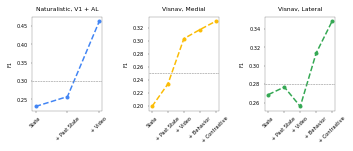

In [5]:
import matplotlib.lines as mlines
set_research_params()

exp_pth_lat = "./models/tensorboard/visnav_lateral/behavior_pred_exp/classification/ablations_1"
exp_path_med = "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/1"
exp_path_v1al = "./models/tensorboard/Combo3_V1AL/interval_correction/downstream_exp/ablations_2"

# Load your datasets
df1 = pd.read_csv(os.path.join(exp_path_v1al, 'f1_results.csv')).iloc[:-1]
df2 = pd.read_csv(os.path.join(exp_path_med, 'f1_results.csv'))
df3 = pd.read_csv(os.path.join(exp_pth_lat, 'f1_results.csv'))

# set colors
model_colors = ["#4285F4", "#FBBC05", "#34A853", "#EA4335", "#9C27B0"]

# plot labels
labels = ['Naturalistic, V1 + AL', 'Visnav, Medial', 'Visnav, Lateral']

# # Make sure your dataframes are sorted by model_name to align bars correctly
# df1 = df1.sort_values('model', ascending=False)
# df2 = df2.sort_values('model', ascending=False)
# df3 = df3.sort_values('model', ascending=False)

rows = 1
cols = 3
fig, ax = plt.subplots(figsize=(5, 2.2), nrows=rows, ncols=cols)
# Define the bar widt

ax[0].plot(df1['model'], df1['f1'], color=model_colors[0], linewidth=1.5, label=labels[0], linestyle='--', marker='o', markersize=3)
ax[1].plot(df2['model'], df2['f1'], color=model_colors[1], linewidth=1.5, label=labels[1], linestyle='--', marker='o', markersize=3)
ax[2].plot(df3['model'], df3['f1'], color=model_colors[2], linewidth=1.5, label=labels[2], linestyle='--', marker='o', markersize=3)

# rotate x labels
for n, ax in enumerate(fig.axes):
    ax.set_title(labels[n])
    ax.set_ylabel('F1')
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.tight_layout()

# add y line as baseline
baselines = [0.3, 0.25, 0.28]
for n, ax in enumerate(fig.axes):
    ax.axhline(y=baselines[n], color='grey', linestyle='--', linewidth=0.5)

save_path = "./results"
# make background white
plt.savefig(os.path.join(save_path, "f1_results.pdf"), bbox_inches='tight', pad_inches=0, dpi=500, facecolor='white')
plt.savefig(os.path.join(save_path, "f1_results.png"), bbox_inches='tight', pad_inches=0, dpi=500, facecolor='white')